<a href="https://colab.research.google.com/github/kiranbapatla/Time-Series-Yellow-Stemborer-Prediction-Light-trap/blob/main/MLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importimg the libraries
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential # layer after layer
from keras.layers import Dense, Dropout, BatchNormalization # dense network
from tensorflow.keras.optimizers import Adam
from keras.preprocessing.sequence import TimeseriesGenerator
from sklearn.metrics import mean_squared_error # metrices
from sklearn.metrics import r2_score # r2 value
from sklearn.metrics import mean_absolute_error as mae # MAE value
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math


In [ ]:
#importing the data file in csv format from google drive files
df = pd.read_csv('/content/drive/MyDrive/LSTM_ANN_time_series/Raw_Data_YSB.csv')

In [ ]:
#information about columns in the data file like data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1703 entries, 0 to 1702
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1703 non-null   object 
 1   YSB     1703 non-null   int64  
 2   Temp    1703 non-null   float64
 3   RH      1703 non-null   float64
 4   RF      1703 non-null   float64
dtypes: float64(3), int64(1), object(1)
memory usage: 66.6+ KB


In [ ]:
#Formating the Date column to date, month and year format
df ['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')

array([<Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>, <Axes: xlabel='Date'>], dtype=object)

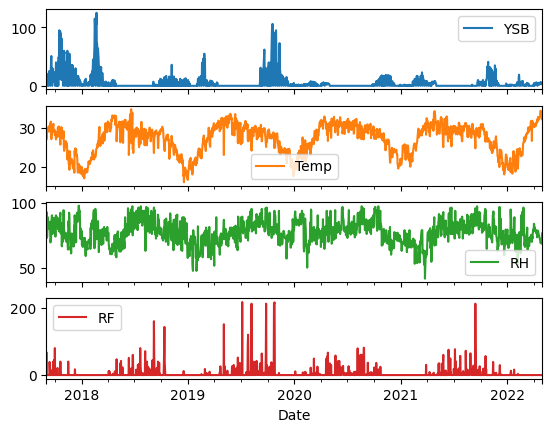

In [ ]:
#Indexing the Date column for plotting
df.set_index('Date')[['YSB','Temp','RH','RF']].plot(subplots=True)

In [ ]:
#information of data frame
df

,Date,YSB,Temp,RH,RF
0,2017-09-01,0,29.95,84.5,0.0
1,2017-09-02,0,26.95,93.0,68.0
2,2017-09-03,0,27.95,93.0,0.0
3,2017-09-04,4,30.05,73.0,0.0
4,2017-09-05,7,29.95,74.5,0.0
...,...,...,...,...,...
1698,2022-04-26,5,33.45,70.0,0.0
1699,2022-04-27,6,33.50,70.0,0.0
1700,2022-04-28,5,32.85,68.5,0.0
1701,2022-04-29,4,33.85,69.0,0.0


In [ ]:
# Indexing the date column
df.set_index('Date', inplace = True)

In [ ]:
# Information of data frame
df

,YSB,Temp,RH,RF
Date,,,,
2017-09-01,0,29.95,84.5,0.0
2017-09-02,0,26.95,93.0,68.0
2017-09-03,0,27.95,93.0,0.0
2017-09-04,4,30.05,73.0,0.0
2017-09-05,7,29.95,74.5,0.0
...,...,...,...,...
2022-04-26,5,33.45,70.0,0.0
2022-04-27,6,33.50,70.0,0.0
2022-04-28,5,32.85,68.5,0.0


In [ ]:
# reversing the indexing of date column
df.reset_index().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1703 entries, 0 to 1702
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    1703 non-null   datetime64[ns]
 1   YSB     1703 non-null   int64         
 2   Temp    1703 non-null   float64       
 3   RH      1703 non-null   float64       
 4   RF      1703 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(1)
memory usage: 66.6 KB


In [ ]:
# printing the information about the data frame
print ("Rows     : " , df.shape[0])
print ("Columns   : ", df.shape[1])
print ("\nFeatures :\n" , df.columns.tolist())
print ("\nMissing values :  " , df.isnull().any())
print ("\nUnique values : \n", df.nunique())

Rows     :  1703
Columns   :  4

Features :
 ['YSB', 'Temp', 'RH', 'RF']

Missing values :   YSB     False
Temp    False
RH      False
RF      False
dtype: bool

Unique values : 
 YSB      73
Temp    317
RH      105
RF      145
dtype: int64


array([<Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>, <Axes: xlabel='Date'>], dtype=object)

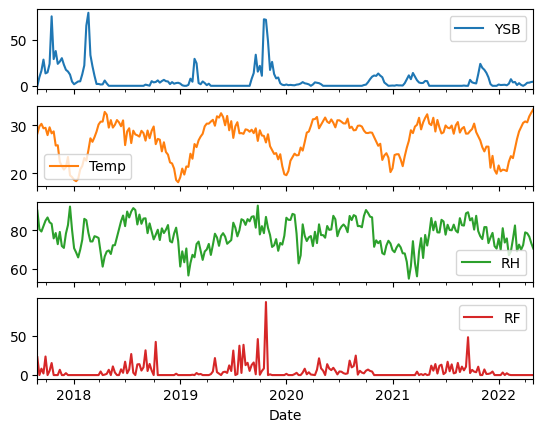

In [ ]:
# plotting the weekly means
df.resample('W').mean().plot(subplots=True)

In [ ]:
#removing the index from df
n_df=df.reset_index()

In [ ]:
n_df

,Date,YSB,Temp,RH,RF
0,2017-09-01,0,29.95,84.5,0.0
1,2017-09-02,0,26.95,93.0,68.0
2,2017-09-03,0,27.95,93.0,0.0
3,2017-09-04,4,30.05,73.0,0.0
4,2017-09-05,7,29.95,74.5,0.0
...,...,...,...,...,...
1698,2022-04-26,5,33.45,70.0,0.0
1699,2022-04-27,6,33.50,70.0,0.0
1700,2022-04-28,5,32.85,68.5,0.0
1701,2022-04-29,4,33.85,69.0,0.0


In [ ]:
#n_df.to_csv('weekly_mean_data.csv')

In [ ]:
print ("Rows     : " , n_df.shape[0])
print ("Columns   : ", n_df.shape[1])
print ("\nFeatures :\n" , n_df.columns.tolist())
print ("\nMissing values :  " , n_df.isnull().any())
print ("\nUnique values : \n", n_df.nunique())

Rows     :  1703
Columns   :  5

Features :
 ['Date', 'YSB', 'Temp', 'RH', 'RF']

Missing values :   Date    False
YSB     False
Temp    False
RH      False
RF      False
dtype: bool

Unique values : 
 Date    1703
YSB       73
Temp     317
RH       105
RF       145
dtype: int64


In [ ]:
#defining the new data frame as x
df_input = n_df[['YSB','Temp','RH','RF']]

In [ ]:
# information about new dataframe
df_input

,YSB,Temp,RH,RF
0,0,29.95,84.5,0.0
1,0,26.95,93.0,68.0
2,0,27.95,93.0,0.0
3,4,30.05,73.0,0.0
4,7,29.95,74.5,0.0
...,...,...,...,...
1698,5,33.45,70.0,0.0
1699,6,33.50,70.0,0.0
1700,5,32.85,68.5,0.0
1701,4,33.85,69.0,0.0


In [ ]:
# descriptive statistics of df
df_input.describe()

,YSB,Temp,RH,RF
count,1703.000000,1703.000000,1703.000000,1703.000000
mean,6.342337,27.084204,77.433412,4.860752
std,14.889673,3.853444,9.078416,18.879918
min,0.000000,16.000000,41.500000,0.000000
25%,0.000000,24.300000,71.500000,0.000000
50%,0.000000,28.100000,77.500000,0.000000
75%,6.000000,30.050000,83.500000,0.000000
max,125.000000,34.750000,98.000000,217.000000


In [ ]:
#Scaling the data from 0 to 1
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(df_input)

In [ ]:
# info ablut scaled data
data_scaled

array([[0.        , 0.744     , 0.76106195, 0.        ],
       [0.        , 0.584     , 0.91150442, 0.31336406],
       [0.        , 0.63733333, 0.91150442, 0.        ],
       ...,
       [0.04      , 0.89866667, 0.47787611, 0.        ],
       [0.032     , 0.952     , 0.48672566, 0.        ],
       [0.024     , 0.864     , 0.61946903, 0.        ]])

In [ ]:
# defining the input
input = data_scaled

In [ ]:
# shape of input data (rows, columns)
input.shape

(1703, 4)

In [ ]:
# info about input
input

array([[0.        , 0.744     , 0.76106195, 0.        ],
       [0.        , 0.584     , 0.91150442, 0.31336406],
       [0.        , 0.63733333, 0.91150442, 0.        ],
       ...,
       [0.04      , 0.89866667, 0.47787611, 0.        ],
       [0.032     , 0.952     , 0.48672566, 0.        ],
       [0.024     , 0.864     , 0.61946903, 0.        ]])

In [ ]:
# defining the output
output = data_scaled[:,0]

In [ ]:
# info about output
output

array([0.   , 0.   , 0.   , ..., 0.04 , 0.032, 0.024])

In [ ]:
# shape of output data (rows, columns)
output.shape

(1703,)

In [ ]:
# Splitting the input and output data
x_train,x_test,y_train,y_test = train_test_split(input,output,test_size = 0.30, random_state=555, shuffle = False)

In [ ]:
#input shape of training data after splitting
x_train.shape

(1192, 4)

In [ ]:
y_train.shape

(1192,)

In [ ]:
#input shape of testing data after splitting
x_test.shape

(511, 4)

In [ ]:
y_test.shape

(511,)

In [ ]:
# traing and testing data generation
win_length = 1 # past data
batch_size = 1
num_features = 4 # 4 features(YSB, Temp, RH, RF)

In [ ]:
TimeseriesGenerator(x_train, y_train, length = win_length, sampling_rate = 1, batch_size = batch_size)[0]

(array([[[0.        , 0.744     , 0.76106195, 0.        ]]]), array([0.]))

In [ ]:
# traing and testing data generation
train_generator = TimeseriesGenerator(x_train, y_train, length = win_length, sampling_rate = 1, batch_size = batch_size)
test_generator =  TimeseriesGenerator(x_test, y_test, length = win_length, sampling_rate = 1, batch_size = batch_size)

In [ ]:
# MLP model topology
#model = Sequential()
#model.add(Dense(64,input_shape=(win_length, num_features) , activation='sigmoid'))
#model.add(BatchNormalization())  # Adding Batch Normalization
#model.add(Dense(64, activation='sigmoid'))
#model.add(BatchNormalization())  # Adding Batch Normalization
#model.add(Dense(1, activation='sigmoid'))

In [ ]:
#summary of model (no. of nodes in each hidden layer and output layer)
model = Sequential()
model.add(Dense(100,input_shape = (win_length,num_features), activation = 'sigmoid'))
model.add(Dense(1, activation = 'sigmoid'))
model.compile(loss = 'mse', optimizer = 'adam', metrics = ['acc'])
model.summary()

Model: "sequential_41"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_109 (Dense)           (None, 1, 100)            500       
                                                                 
 dense_110 (Dense)           (None, 1, 1)              101       
                                                                 
Total params: 601 (2.35 KB)
Trainable params: 601 (2.35 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
#model fitting
#optimizer = Adam(learning_rate=0.001)  # Adjusted learning rate
#model.compile(loss='mse', optimizer=optimizer, metrics=['accuracy'])
history = model.fit(train_generator, epochs =50, validation_data = test_generator, batch_size=32)

Epoch 1/50
1191/1191 [==============================] - 5s 4ms/step - loss: 0.0192 - acc: 0.5886 - val_loss: 0.0030 - val_acc: 0.5490
Epoch 2/50
1191/1191 [==============================] - 4s 3ms/step - loss: 0.0167 - acc: 0.5886 - val_loss: 0.0027 - val_acc: 0.5490
Epoch 3/50
1191/1191 [==============================] - 5s 4ms/step - loss: 0.0140 - acc: 0.5886 - val_loss: 0.0034 - val_acc: 0.5490
Epoch 4/50
1191/1191 [==============================] - 4s 3ms/step - loss: 0.0115 - acc: 0.5886 - val_loss: 0.0025 - val_acc: 0.5490
Epoch 5/50
1191/1191 [==============================] - 4s 3ms/step - loss: 0.0105 - acc: 0.5886 - val_loss: 0.0026 - val_acc: 0.5490
Epoch 6/50
1191/1191 [==============================] - 5s 5ms/step - loss: 0.0103 - acc: 0.5877 - val_loss: 0.0022 - val_acc: 0.5490
Epoch 7/50
1191/1191 [==============================] - 4s 3ms/step - loss: 0.0101 - acc: 0.5894 - val_loss: 0.0022 - val_acc: 0.5490
Epoch 8/50
1191/1191 [==============================] - 4s 4ms

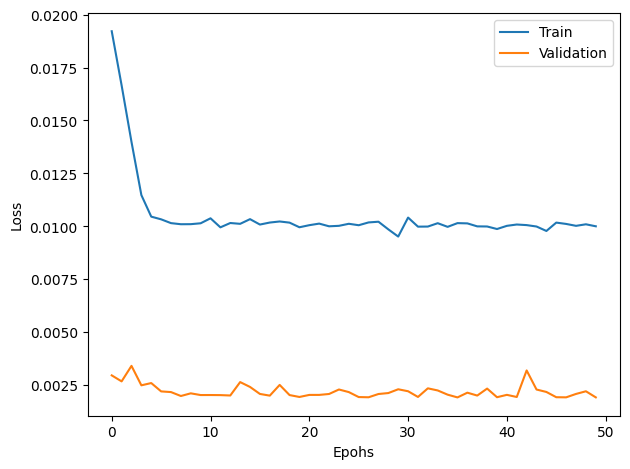

In [ ]:
# Model training and validation Loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('Loss')
plt.xlabel('Epohs')
plt.legend(['Train', 'Validation'], loc = 'upper right')
plt.tight_layout()

In [ ]:
#model evaluation
model.evaluate_generator(train_generator, verbose = 0)
model.evaluate_generator(test_generator, verbose = 0)

<ipython-input-1288-d041f2dfc28d>:2: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  model.evaluate_generator(train_generator, verbose = 0)
<ipython-input-1288-d041f2dfc28d>:3: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  model.evaluate_generator(test_generator, verbose = 0)


[0.0019119270145893097, 0.5490196347236633]

In [ ]:
# prediction of training and testing data
predictions_train = model.predict_generator(train_generator)
predictions_test = model.predict_generator(test_generator)

<ipython-input-1289-fc2d809f150a>:2: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predictions_train = model.predict_generator(train_generator)
<ipython-input-1289-fc2d809f150a>:3: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predictions_test = model.predict_generator(test_generator)


In [ ]:
#shape of prediction train and test
predictions_train.shape[0], predictions_test.shape[0]

(1191, 510)

In [ ]:
# array of train and test predictions
predictions_train, predictions_test

(array([[[0.0281406 ]],
 
        [[0.03502576]],
 
        [[0.02997948]],
 
        ...,
 
        [[0.04717086]],
 
        [[0.04161515]],
 
        [[0.03855797]]], dtype=float32),
 array([[[0.03195921]],
 
        [[0.03900875]],
 
        [[0.03725713]],
 
        [[0.03657781]],
 
        [[0.03302379]],
 
        [[0.03212463]],
 
        [[0.03215034]],
 
        [[0.03209897]],
 
        [[0.03220506]],
 
        [[0.03199436]],
 
        [[0.03161074]],
 
        [[0.03252361]],
 
        [[0.03262867]],
 
        [[0.03268379]],
 
        [[0.03470894]],
 
        [[0.03525669]],
 
        [[0.03552163]],
 
        [[0.03555147]],
 
        [[0.03456772]],
 
        [[0.0348529 ]],
 
        [[0.03621527]],
 
        [[0.03502561]],
 
        [[0.03499809]],
 
        [[0.03698456]],
 
        [[0.03345983]],
 
        [[0.03389019]],
 
        [[0.03476774]],
 
        [[0.03449687]],
 
        [[0.03387474]],
 
        [[0.03344456]],
 
        [[0.03495589]],
 
        

In [ ]:
predictions_train.shape

(1191, 1, 1)

In [ ]:
predictions_train.ndim

3

In [ ]:
predictions_test.shape

(510, 1, 1)

In [ ]:
predictions_test.ndim

3

In [ ]:
# Change the dimension of the prediction train from 3D to 2D
predictions_train = predictions_train.reshape((1191,1)) # take train values from prediction train
predictions_train

array([[0.0281406 ],
       [0.03502576],
       [0.02997948],
       ...,
       [0.04717086],
       [0.04161515],
       [0.03855797]], dtype=float32)

In [ ]:
# Change the dimension of the prediction test from 3D to 2D
predictions_test = predictions_test.reshape((510,1)) # take train values from prediction test
predictions_test

array([[0.03195921],
       [0.03900875],
       [0.03725713],
       [0.03657781],
       [0.03302379],
       [0.03212463],
       [0.03215034],
       [0.03209897],
       [0.03220506],
       [0.03199436],
       [0.03161074],
       [0.03252361],
       [0.03262867],
       [0.03268379],
       [0.03470894],
       [0.03525669],
       [0.03552163],
       [0.03555147],
       [0.03456772],
       [0.0348529 ],
       [0.03621527],
       [0.03502561],
       [0.03499809],
       [0.03698456],
       [0.03345983],
       [0.03389019],
       [0.03476774],
       [0.03449687],
       [0.03387474],
       [0.03344456],
       [0.03495589],
       [0.03193618],
       [0.0306462 ],
       [0.03133554],
       [0.03111622],
       [0.03123185],
       [0.03055869],
       [0.0336975 ],
       [0.03379478],
       [0.03228258],
       [0.03185469],
       [0.0348123 ],
       [0.03351426],
       [0.03417137],
       [0.03360023],
       [0.03080372],
       [0.03085291],
       [0.034

In [ ]:
predictions_train.shape

(1191, 1)

In [ ]:
predictions_test.shape

(510, 1)

In [ ]:
#array of training and testing input data
x_train, x_test

(array([[0.        , 0.744     , 0.76106195, 0.        ],
        [0.        , 0.584     , 0.91150442, 0.31336406],
        [0.        , 0.63733333, 0.91150442, 0.        ],
        ...,
        [0.048     , 0.41066667, 0.43362832, 0.        ],
        [0.032     , 0.4       , 0.52212389, 0.        ],
        [0.        , 0.40533333, 0.46017699, 0.        ]]),
 array([[0.        , 0.4       , 0.43362832, 0.        ],
        [0.04      , 0.45066667, 0.4159292 , 0.        ],
        [0.032     , 0.45333333, 0.4159292 , 0.        ],
        ...,
        [0.04      , 0.89866667, 0.47787611, 0.        ],
        [0.032     , 0.952     , 0.48672566, 0.        ],
        [0.024     , 0.864     , 0.61946903, 0.        ]]))

In [ ]:
#array of training and testing output data
y_train, y_test

(array([0.   , 0.   , 0.   , ..., 0.048, 0.032, 0.   ]),
 array([0.   , 0.04 , 0.032, 0.024, 0.008, 0.   , 0.   , 0.   , 0.   ,
        0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   , 0.   , 0.008, 0.   , 0.   , 0.016, 0.   , 0.   , 0.   ,
        0.   , 0.   , 0.   , 0.008, 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   , 0.016, 0.016, 0.   , 0.   , 0.008, 0.   , 0.008, 0.008,
        0.   , 0.   , 0.008, 0.   , 0.   , 0.   , 0.   , 0.008, 0.   ,
        0.016, 0.   , 0.   , 0.008, 0.   , 0.   , 0.   , 0.008, 0.   ,
        0.   , 0.   , 0.   , 0.056, 0.04 , 0.064, 0.   , 0.   , 0.056,
        0.072, 0.096, 0.064, 0.04 , 0.072, 0.   , 0.096, 0.096, 0.136,
        0.072, 0.136, 0.096, 0.   , 0.   , 0.072, 0.072, 0.04 , 0.056,
        0.064, 0.096, 0.   , 0.136, 0.12 , 0.08 , 0.104, 0.152, 0.184,
        0.   , 0.12 , 0.136, 0.096, 0.072, 0.064, 0.064, 0.   , 0.072,
        0.064, 0.056, 0.04 , 0.04 , 0.064, 0.   , 0.04 , 0.064, 0.024,
        0.024, 0.008

In [ ]:
# Slicing the output column from the train and test data
x_train[:,1:][win_length:], x_test[:,1:][win_length:]

(array([[0.584     , 0.91150442, 0.31336406],
        [0.63733333, 0.91150442, 0.        ],
        [0.74933333, 0.55752212, 0.        ],
        ...,
        [0.41066667, 0.43362832, 0.        ],
        [0.4       , 0.52212389, 0.        ],
        [0.40533333, 0.46017699, 0.        ]]),
 array([[0.45066667, 0.4159292 , 0.        ],
        [0.45333333, 0.4159292 , 0.        ],
        [0.44      , 0.63716814, 0.        ],
        ...,
        [0.89866667, 0.47787611, 0.        ],
        [0.952     , 0.48672566, 0.        ],
        [0.864     , 0.61946903, 0.        ]]))

In [ ]:
x_train[:,1:][win_length:].shape

(1191, 3)

In [ ]:
x_test[:,1:][win_length:].shape

(510, 3)

In [ ]:
# concatinating/appending the predicted and train/test dataframes into one dataframe
df_train_pred = pd.concat([pd.DataFrame(predictions_train), pd.DataFrame(x_train[:,1:][win_length:])], axis = 1)
df_test_pred = pd.concat([pd.DataFrame(predictions_test), pd.DataFrame(x_test[:,1:][win_length:])], axis = 1)

In [ ]:
# inversing the normalized values of predicted and train/test dataframes
rev_trans_train = scaler.inverse_transform(df_train_pred)
rev_trans_test = scaler.inverse_transform(df_test_pred)

In [ ]:
rev_trans_train, rev_trans_test

(array([[ 3.51757533, 26.95      , 93.        , 68.        ],
        [ 4.37822007, 27.95      , 93.        ,  0.        ],
        [ 3.74743459, 30.05      , 73.        ,  0.        ],
        ...,
        [ 5.89635735, 23.7       , 66.        ,  0.        ],
        [ 5.20189386, 23.5       , 71.        ,  0.        ],
        [ 4.81974566, 23.6       , 67.5       ,  0.        ]]),
 array([[ 3.99490166, 24.45      , 65.        ,  0.        ],
        [ 4.87609394, 24.5       , 65.        ,  0.        ],
        [ 4.65714093, 24.25      , 77.5       ,  0.        ],
        ...,
        [ 4.11331467, 32.85      , 68.5       ,  0.        ],
        [ 3.98729602, 33.85      , 69.        ,  0.        ],
        [ 3.72405606, 32.2       , 76.5       ,  0.        ]]))

In [ ]:
#creating the data frame based on original dataframe
x = n_df[['YSB','Temp','RH','RF']]

In [ ]:
# Slicing the shape of train and test data frames based on prediction shapes
df_train_final = x[:predictions_train.shape[0]]
df_test_final = x[predictions_test.shape[0]*-1:]

In [ ]:
df_train_final.count(), df_test_final.count()

(YSB     1191
 Temp    1191
 RH      1191
 RF      1191
 dtype: int64,
 YSB     510
 Temp    510
 RH      510
 RF      510
 dtype: int64)

In [ ]:
# Appending the predicted column to the train and test dataframe
df_train_final['YSB_Pred'] = rev_trans_train[:,0]
df_test_final['YSB_Pred'] = rev_trans_test[:,0]

<ipython-input-1311-c3d1afb2694d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train_final['YSB_Pred'] = rev_trans_train[:,0]
<ipython-input-1311-c3d1afb2694d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test_final['YSB_Pred'] = rev_trans_test[:,0]


In [ ]:
df_train_final

,YSB,Temp,RH,RF,YSB_Pred
0,0,29.95,84.5,0.0,3.517575
1,0,26.95,93.0,68.0,4.378220
2,0,27.95,93.0,0.0,3.747435
3,4,30.05,73.0,0.0,4.115026
4,7,29.95,74.5,0.0,4.725295
...,...,...,...,...,...
1186,0,24.55,69.0,0.0,3.912101
1187,7,24.85,64.0,0.0,5.269803
1188,8,22.40,69.0,0.0,5.896357
1189,6,23.70,66.0,0.0,5.201894


In [ ]:
df_test_final

,YSB,Temp,RH,RF,YSB_Pred
1193,5,24.45,65.0,0.0,3.994902
1194,4,24.50,65.0,0.0,4.876094
1195,3,24.25,77.5,0.0,4.657141
1196,1,24.40,72.0,0.0,4.572226
1197,0,23.90,75.0,0.0,4.127974
...,...,...,...,...,...
1698,5,33.45,70.0,0.0,3.678813
1699,6,33.50,70.0,0.0,3.938959
1700,5,32.85,68.5,0.0,4.113315
1701,4,33.85,69.0,0.0,3.987296


In [ ]:
# calculate root mean square error (RMSE)

trainScore = math.sqrt(mean_squared_error(df_train_final['YSB'], df_train_final['YSB_Pred']))
print('Train Score: %2f RMSE' %(trainScore))

testScore = math.sqrt(mean_squared_error(df_test_final['YSB'], df_test_final['YSB_Pred']))
print('Test Score: %2f RMSE' %(testScore))

# calculate coefficient of determination (r2)

r2 = r2_score(df_train_final['YSB'], df_train_final['YSB_Pred'])
print(('Train Score: %2f r2' %(r2)))

r2 = r2_score(df_test_final['YSB'], df_test_final['YSB_Pred'])
print(('Test Score: %2f r2' %(r2)))

# calculate mean absolute error (MAE)

MAE = mae(df_train_final['YSB'], df_train_final['YSB_Pred'])
print(('Train Score: %2f MAE' %(MAE)))

MAE = mae(df_test_final['YSB'], df_test_final['YSB_Pred'])
print(('Test Score: %2f MAE' %(MAE)))

Train Score: 6.870784 RMSE
Test Score: 5.465699 RMSE
Train Score: 0.839506 r2
Test Score: 0.242014 r2
Train Score: 5.116515 MAE
Test Score: 4.063638 MAE


In [ ]:
# train_data_export
train_act_pred = pd.DataFrame(columns=['Date', 'Actual', 'Predicted'])
train_act_pred['Date'] = pd.date_range(start='2017-09-01', end = '2020-12-04') # change the end date according to test size
train_act_pred['Actual'] = df_train_final['YSB']
train_act_pred['Predicted'] = df_train_final['YSB_Pred']
train_act_pred.to_csv('MLP_train_act_pred.csv')

In [ ]:
# test_data_export
test_act_pred = pd.DataFrame(columns=['Date', 'Actual', 'Predicted'])
test_act_pred['Date'] = pd.date_range(start='2020-12-07', end = '2022-04-30') # change the end date according to test size
df_test_final = df_test_final.set_index(test_act_pred.index) # set the both dataframes index same
test_act_pred['Actual'] = df_test_final['YSB']
test_act_pred['Predicted'] = df_test_final['YSB_Pred']
test_act_pred.to_csv('MLP_test_act_pred.csv')

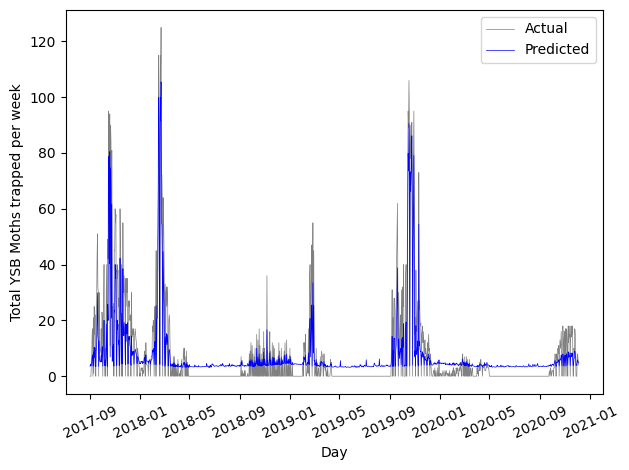

In [ ]:
# train plot
plt.plot(train_act_pred['Date'], train_act_pred['Actual'], color = 'grey', lw = 0.5)
plt.plot(train_act_pred['Date'], train_act_pred['Predicted'], color = 'blue', lw = 0.5)
plt.ylabel('Total YSB Moths trapped per week')
plt.xlabel('Day')
plt.xticks(rotation = 25)
plt.legend(['Actual', 'Predicted'])
plt.tight_layout()
plt.savefig('MLP_train_actual_predicted.pdf', dpi=300)
plt.show()

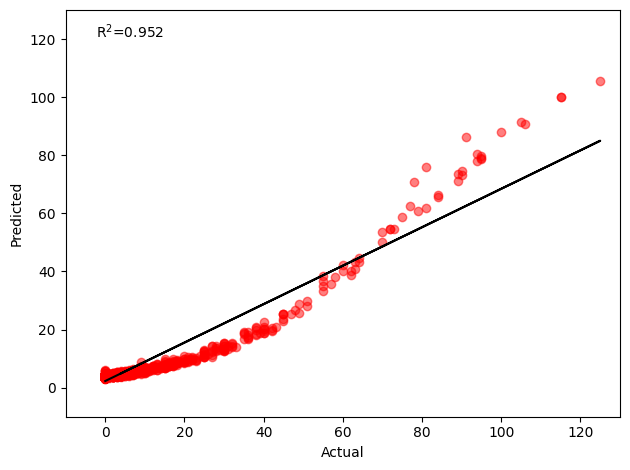

In [ ]:
# Scatter plot with regression line
plt.scatter(train_act_pred['Actual'],train_act_pred['Predicted'], color = 'red', alpha = 0.5)
#obtain m (slope) and b(intercept) of linear regression line
m, b = np.polyfit(train_act_pred['Actual'], train_act_pred['Predicted'], 1)
#add linear regression line to scatterplot
plt.plot(train_act_pred['Actual'], m*train_act_pred['Actual']+b, color='black') #(x, m*x+b)
plt.xlim(-10,130)
plt.ylim(-10,130)
plt.ylabel('Predicted')
plt.xlabel('Actual')
plt.tight_layout()
#plt.legend('R2: ' + str(r2_score(train_act_pred['Actual'], train_act_pred['Predicted'])))
rvalue = stats.linregress(train_act_pred['Actual'],train_act_pred['Predicted'])
plt.annotate("R$^2$=%.3f"%(rvalue.rvalue),xy=(0.15,0.9),xycoords='figure fraction')
plt.savefig('MLP_train_actual_scatter_plot.pdf', dpi=300)
plt.show()

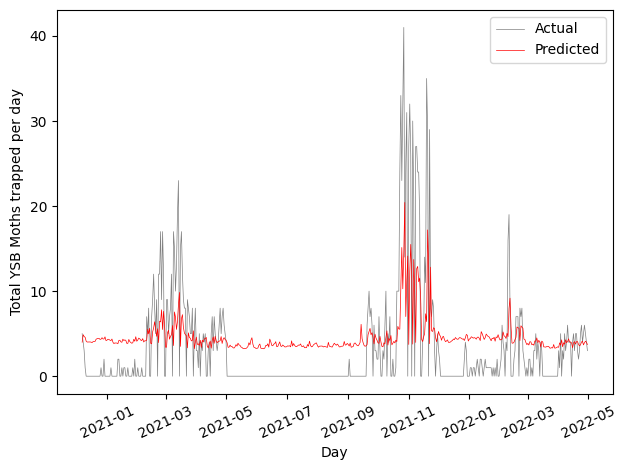

In [ ]:
# test plot
plt.plot(test_act_pred['Date'], test_act_pred['Actual'], color = 'grey', lw = 0.5)
plt.plot(test_act_pred['Date'], test_act_pred['Predicted'], color = 'red', lw = 0.5)
plt.ylabel('Total YSB Moths trapped per day')
plt.xlabel('Day')
plt.xticks(rotation = 25)
plt.legend(['Actual', 'Predicted'])
plt.tight_layout()
plt.savefig('MLP_test_actual_predicted.pdf', dpi=300)
plt.show()

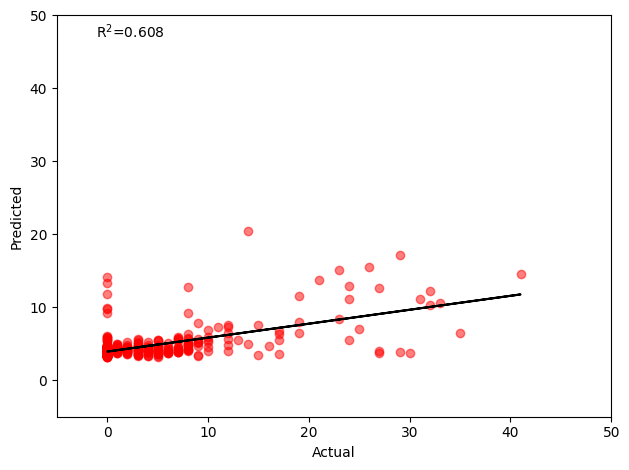

In [ ]:
# Scatter plot with regression line
plt.scatter(test_act_pred['Actual'],test_act_pred['Predicted'], color = 'red', alpha = 0.5)
#obtain m (slope) and b(intercept) of linear regression line
m, b = np.polyfit(test_act_pred['Actual'], test_act_pred['Predicted'], 1)
#add linear regression line to scatterplot
plt.plot(test_act_pred['Actual'], m*test_act_pred['Actual']+b, color='black') #(x, m*x+b)
plt.xlim(-5,50)
plt.ylim(-5,50)
plt.ylabel('Predicted')
plt.xlabel('Actual')
plt.tight_layout()
rvalue = stats.linregress(test_act_pred['Actual'],test_act_pred['Predicted'])
plt.annotate("R$^2$=%.3f"%(rvalue.rvalue),xy=(0.15,0.9),xycoords='figure fraction')
plt.savefig('MLP_test_actual_scatter_plot.pdf', dpi=300)
plt.show()